latent dim 8
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.55      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.52      0.50      0.34      4995
weighted avg       0.52      0.50      0.34      4995



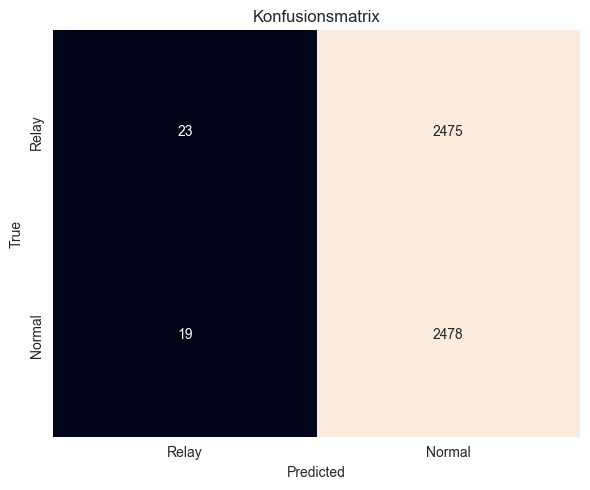

latent dim 8
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.44      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.47      0.50      0.34      4995
weighted avg       0.47      0.50      0.34      4995



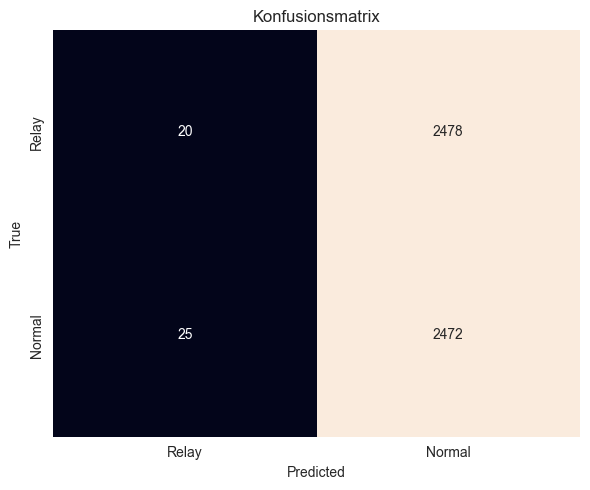

latent dim 8
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.40      0.01      0.01      2498

    accuracy                           0.50      4995
   macro avg       0.45      0.50      0.34      4995
weighted avg       0.45      0.50      0.34      4995



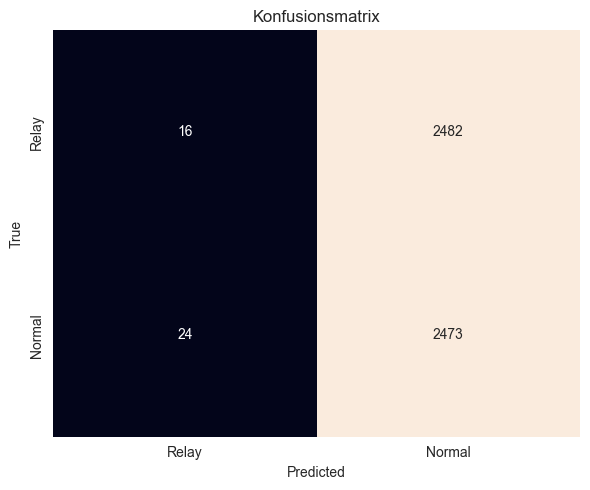

latent dim 2
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.57      0.02      0.03      2498

    accuracy                           0.50      4995
   macro avg       0.54      0.50      0.35      4995
weighted avg       0.54      0.50      0.35      4995



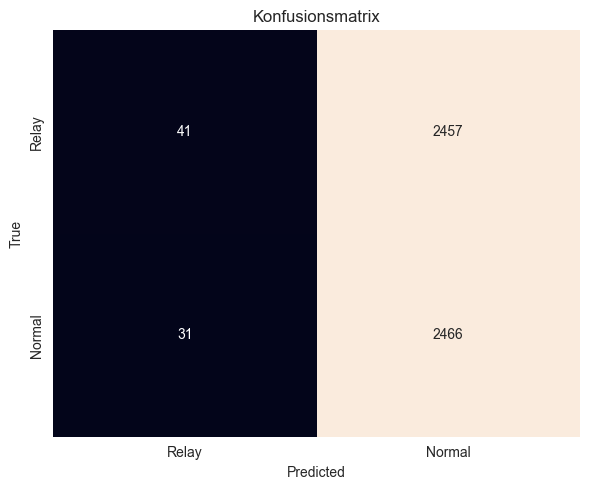

latent dim 2
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.45      0.01      0.01      2498

    accuracy                           0.50      4995
   macro avg       0.48      0.50      0.34      4995
weighted avg       0.48      0.50      0.34      4995



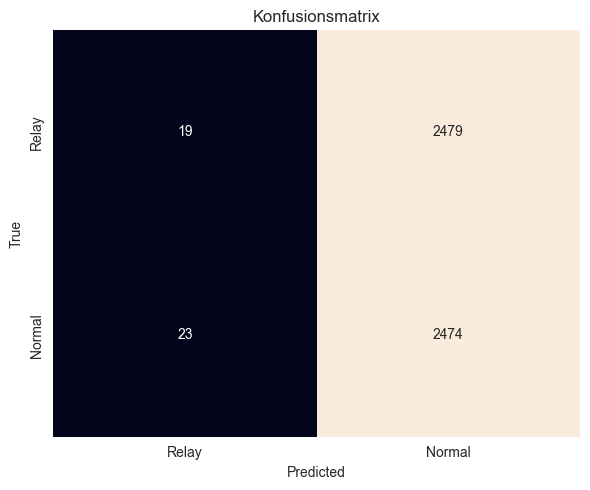

latent dim 2
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.56      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.53      0.50      0.34      4995
weighted avg       0.53      0.50      0.34      4995



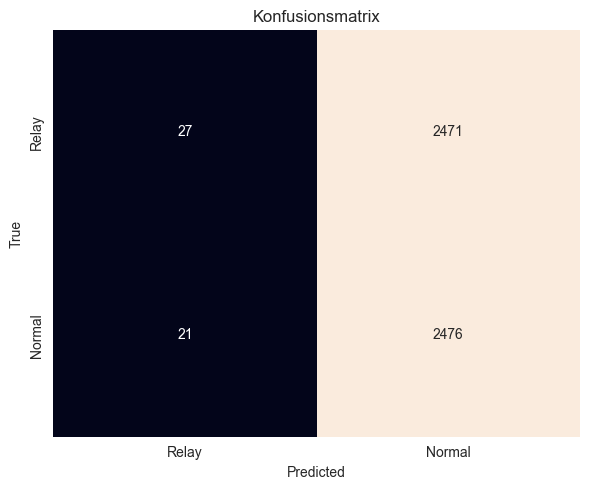

latent dim 32
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.53      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.51      0.50      0.34      4995
weighted avg       0.51      0.50      0.34      4995



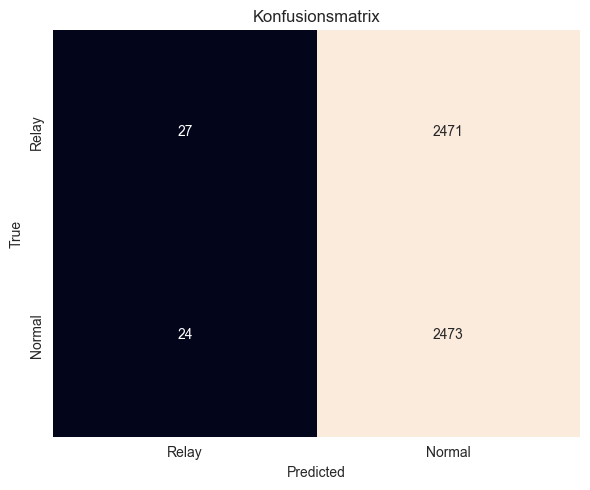

latent dim 32
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.41      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.45      0.50      0.34      4995
weighted avg       0.45      0.50      0.34      4995



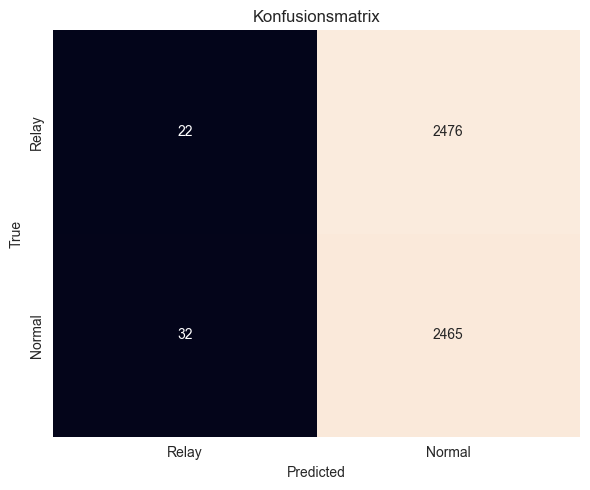

latent dim 32
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.51      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.51      0.50      0.34      4995
weighted avg       0.51      0.50      0.34      4995



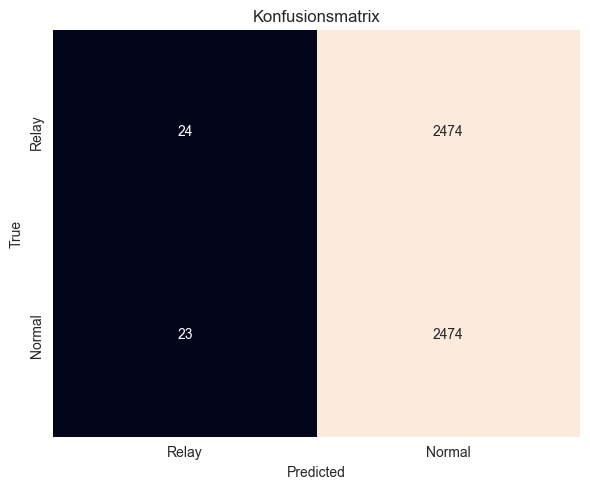

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2,8,32}:
    for d in {0.05,0.1,0.2}:
        clf = ALAD(contamination=0.01, latent_dim=l, dropout_rate=d, enc_layers=[100,50,25], dec_layers=[25, 50, 100])
        clf.fit(X_train)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent dim {l}")
        print(f"dropout rate {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

latent dim 8
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.81      0.03      0.06      2498

    accuracy                           0.51      4995
   macro avg       0.66      0.51      0.37      4995
weighted avg       0.66      0.51      0.37      4995



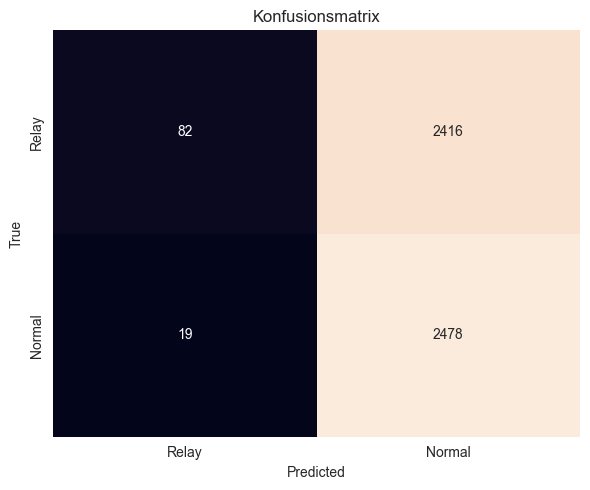

latent dim 8
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.73      0.03      0.05      2498

    accuracy                           0.51      4995
   macro avg       0.62      0.51      0.36      4995
weighted avg       0.62      0.51      0.36      4995



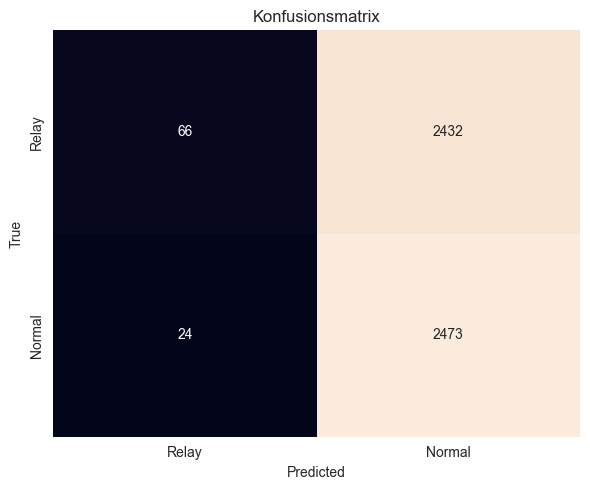

latent dim 8
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.54      0.01      0.03      2498

    accuracy                           0.50      4995
   macro avg       0.52      0.50      0.35      4995
weighted avg       0.52      0.50      0.35      4995



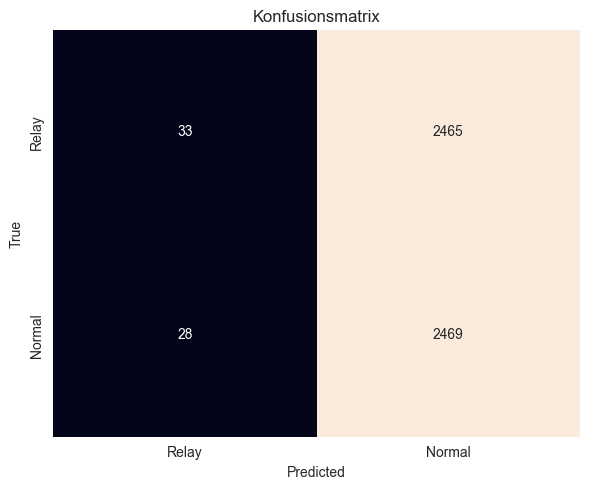

latent dim 2
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      2497
       Relay       0.88      0.08      0.14      2498

    accuracy                           0.53      4995
   macro avg       0.70      0.53      0.41      4995
weighted avg       0.70      0.53      0.41      4995



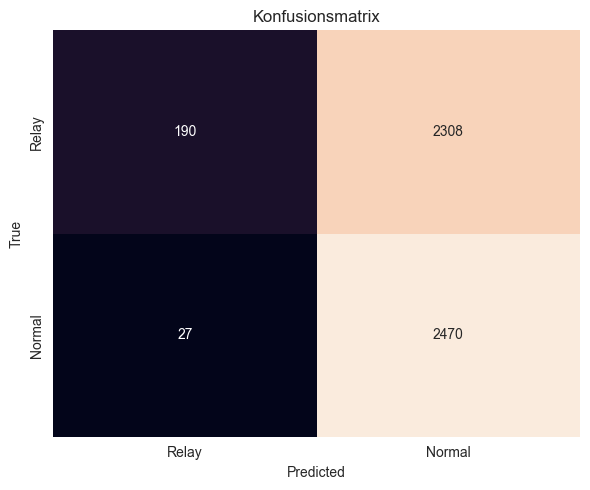

latent dim 2
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.73      0.03      0.06      2498

    accuracy                           0.51      4995
   macro avg       0.62      0.51      0.36      4995
weighted avg       0.62      0.51      0.36      4995



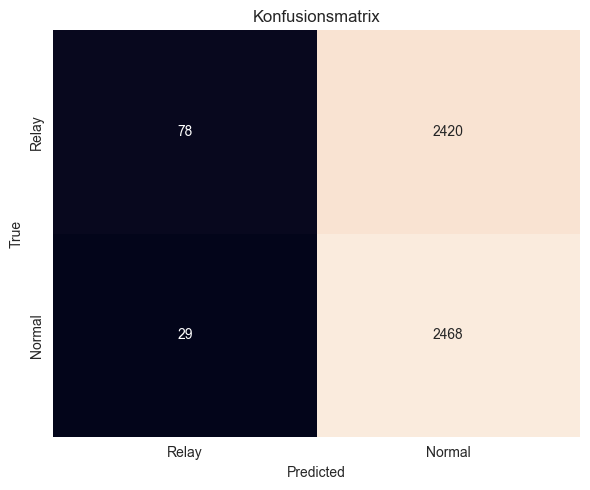

latent dim 2
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.73      0.02      0.04      2498

    accuracy                           0.51      4995
   macro avg       0.62      0.51      0.36      4995
weighted avg       0.62      0.51      0.36      4995



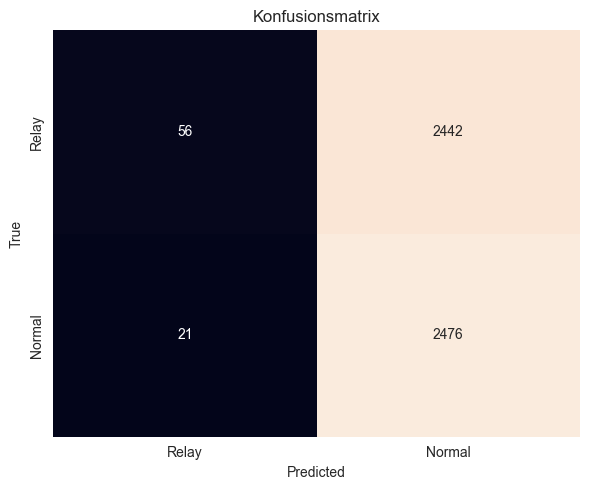

latent dim 32
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.84      0.05      0.09      2498

    accuracy                           0.52      4995
   macro avg       0.67      0.52      0.38      4995
weighted avg       0.67      0.52      0.38      4995



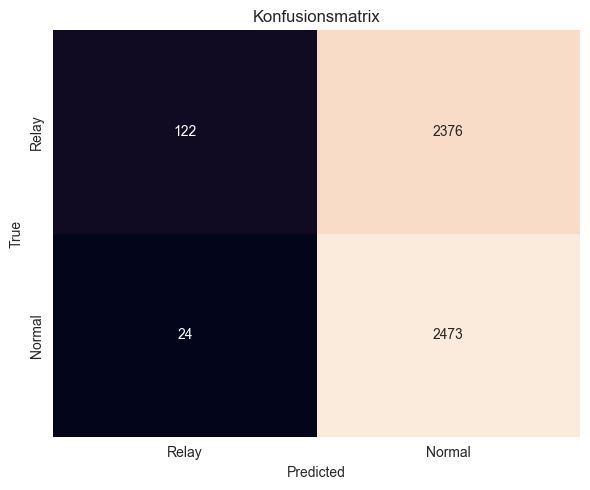

latent dim 32
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.82      0.05      0.10      2498

    accuracy                           0.52      4995
   macro avg       0.66      0.52      0.38      4995
weighted avg       0.66      0.52      0.38      4995



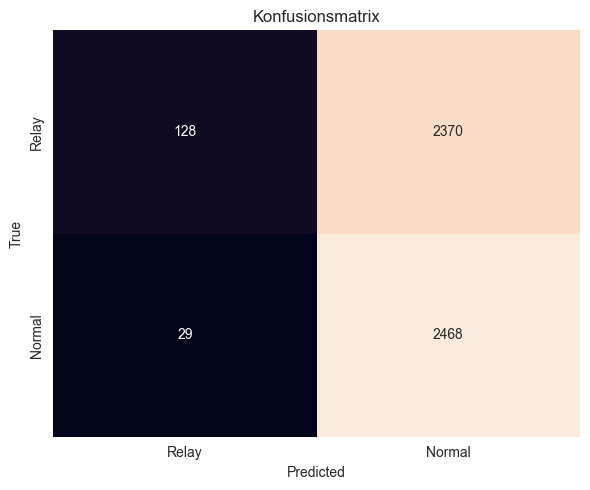

latent dim 32
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      2497
       Relay       0.53      0.01      0.03      2498

    accuracy                           0.50      4995
   macro avg       0.52      0.50      0.35      4995
weighted avg       0.52      0.50      0.35      4995



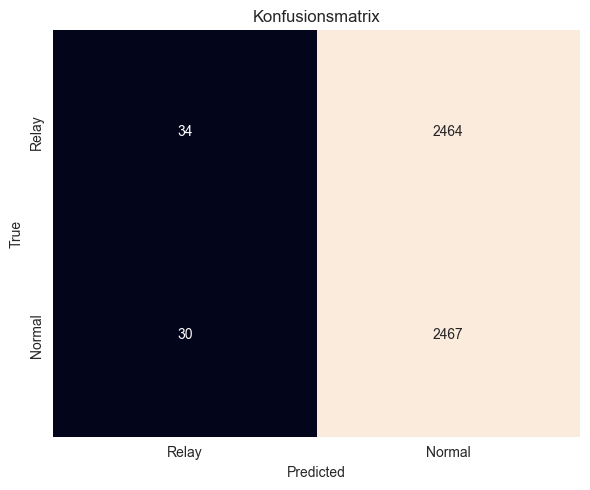

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2,8,32}:
    for d in {0.05,0.1,0.2}:
        clf = ALAD(contamination=0.01, latent_dim=l, dropout_rate=d, enc_layers=[100,50,25], dec_layers=[25, 50, 100])
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent dim {l}")
        print(f"dropout rate {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

latent dim 8
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.58      0.01      0.03      2498

    accuracy                           0.50      4995
   macro avg       0.54      0.50      0.35      4995
weighted avg       0.54      0.50      0.35      4995



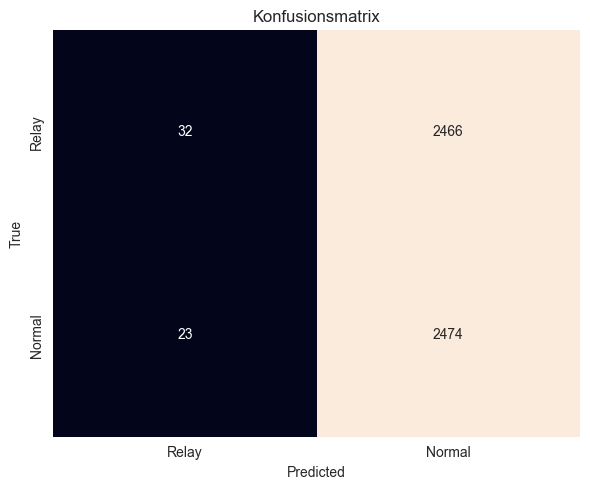

latent dim 8
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.68      2497
       Relay       0.85      0.06      0.11      2498

    accuracy                           0.52      4995
   macro avg       0.68      0.52      0.39      4995
weighted avg       0.68      0.52      0.39      4995



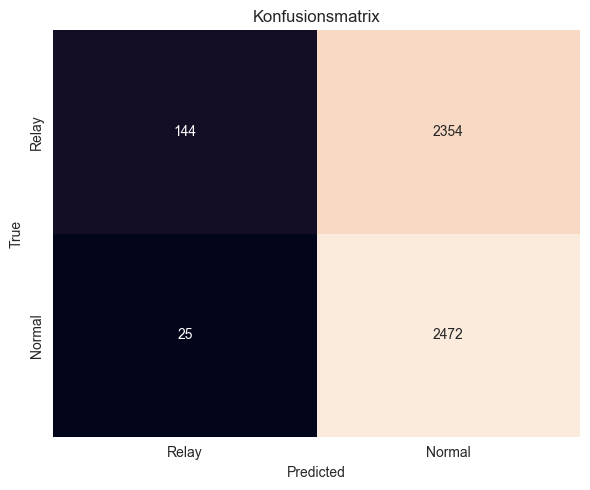

latent dim 8
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.82      0.03      0.06      2498

    accuracy                           0.51      4995
   macro avg       0.66      0.51      0.36      4995
weighted avg       0.66      0.51      0.36      4995



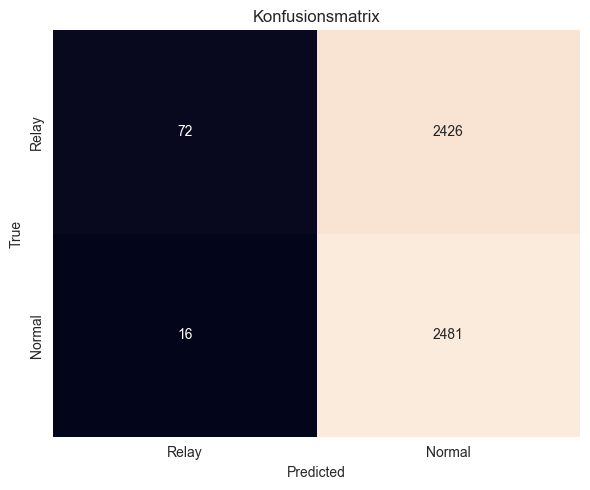

latent dim 2
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      2497
       Relay       0.89      0.09      0.16      2498

    accuracy                           0.54      4995
   macro avg       0.70      0.54      0.42      4995
weighted avg       0.70      0.54      0.42      4995



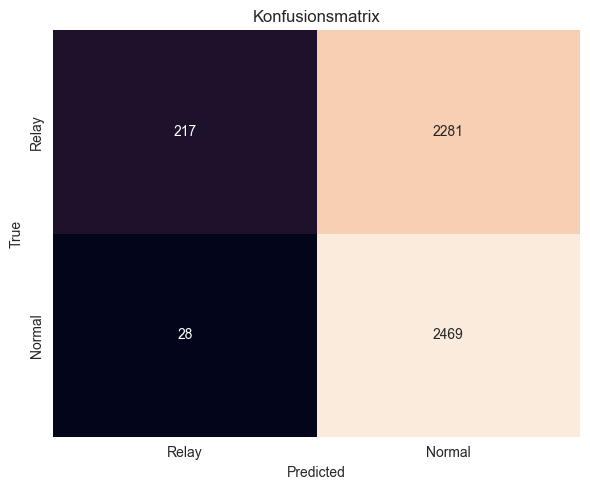

latent dim 2
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.83      0.04      0.08      2498

    accuracy                           0.52      4995
   macro avg       0.67      0.52      0.38      4995
weighted avg       0.67      0.52      0.38      4995



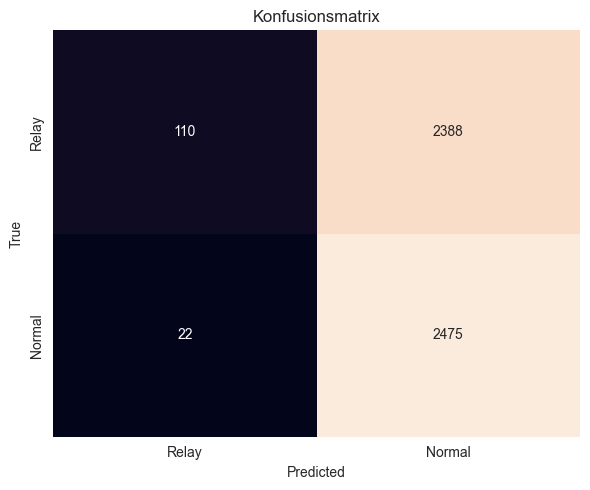

latent dim 2
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.67      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.58      0.50      0.35      4995
weighted avg       0.58      0.50      0.35      4995



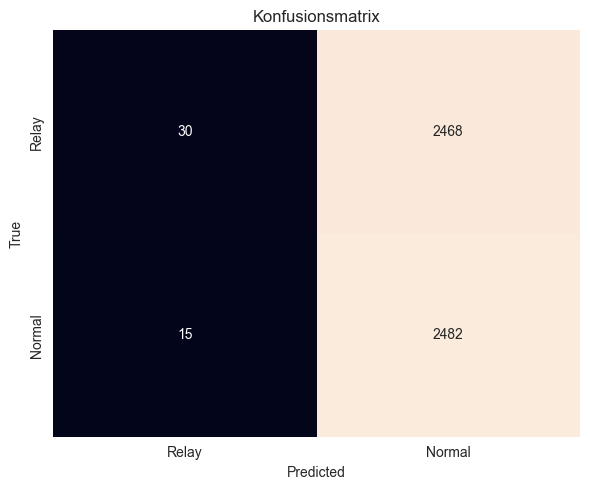

latent dim 32
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2497
       Relay       0.72      0.03      0.06      2498

    accuracy                           0.51      4995
   macro avg       0.61      0.51      0.37      4995
weighted avg       0.61      0.51      0.37      4995



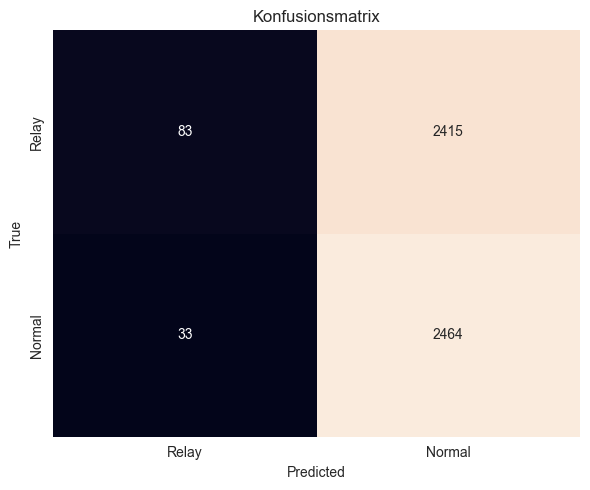

latent dim 32
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.72      0.02      0.04      2498

    accuracy                           0.51      4995
   macro avg       0.61      0.51      0.35      4995
weighted avg       0.61      0.51      0.35      4995



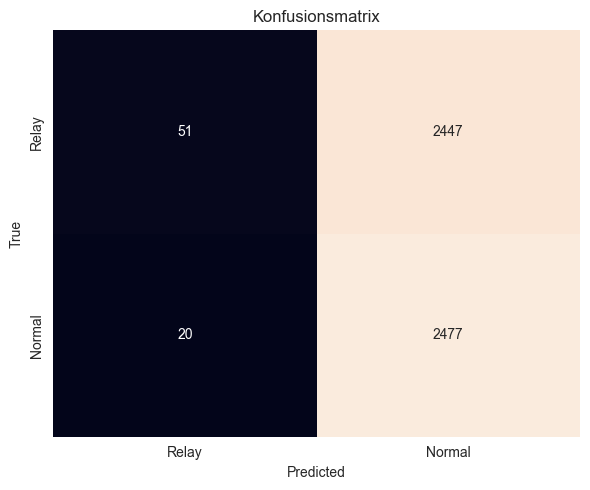

latent dim 32
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2497
       Relay       0.62      0.01      0.02      2498

    accuracy                           0.50      4995
   macro avg       0.56      0.50      0.35      4995
weighted avg       0.56      0.50      0.35      4995



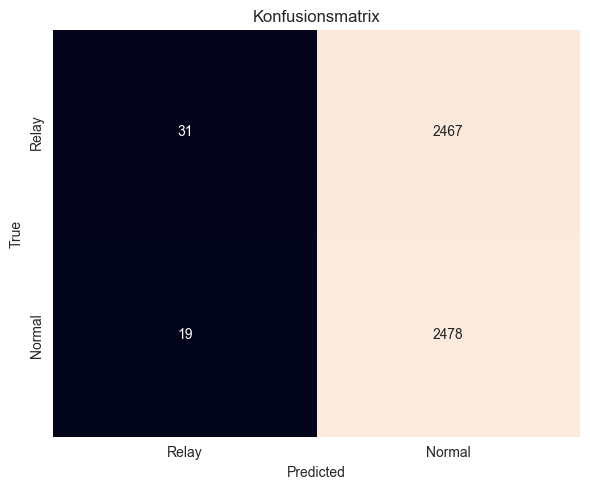

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2,8,32}:
    for d in {0.05,0.1,0.2}:
        clf = ALAD(contamination=0.01, latent_dim=l, dropout_rate=d, enc_layers=[100,50,25], dec_layers=[25, 50, 100])
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent dim {l}")
        print(f"dropout rate {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()